In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import tensorflow as tf

In [2]:
df1 = pd.read_csv('datasets-location_C/room_climate-location_C-measurement14.csv',header=None)
df2 = pd.read_csv('datasets-location_C/room_climate-location_C-measurement15.csv',header=None)

In [3]:
df1.columns = ['EID', 'AbsT', 'RelT', 'NID', 'Temp', 'RelH', 'L1', 'L2', 'Occ', 'Act', 'Door', 'Win']
df2.columns = ['EID', 'AbsT', 'RelT', 'NID', 'Temp', 'RelH', 'L1', 'L2', 'Occ', 'Act', 'Door', 'Win']

# <EID>: Entry ID
# <AbsT>: Absolute timestamp [ms]
# <RelT>: Relative timestamp [s]
# <NID>: Node ID

# Sensor Data
# <Temp>: Temperature [°C]
# <RelH>: Relative Humidity [%]
# <L1>: Light Sensor 1 (Wavelength) [nm]
# <L2>: Light Sensor 2 (Wavelength) [nm]

# Groundtruth
# <Occ>: Number of occupants (0, 1, 2)
# <Act>: Activity of occupant(s) (0 = n/a, 1 = read, 2 = stand, 3 = walk, 4 = work)
# <Door>: State of Door (0 = closed, 1 = open)
# <Win>: State of Window (0 = closed, 1 = open)

In [4]:
df1.head()

,EID,AbsT,RelT,NID,Temp,RelH,L1,L2,Occ,Act,Door,Win
0,1,1485704352813,1,5,21.97,42.656,151.43,469.2,0,0,0,0
1,2,1485704353224,2,3,22.12,35.933,155.71,446.2,0,0,0,0
2,3,1485704353580,2,2,22.08,51.282,171.43,506.0,0,0,0,0
3,4,1485704353833,2,4,22.12,38.606,210.00,579.6,0,0,0,0
4,5,1485704354085,2,1,22.20,41.522,147.14,377.2,0,0,0,0


In [5]:
df2.head()

,EID,AbsT,RelT,NID,Temp,RelH,L1,L2,Occ,Act,Door,Win
0,1,1485772905281,3,2,21.84,51.039,171.43,483.0,0,0,0,0
1,2,1485772905440,3,5,21.70,42.413,148.57,441.6,0,0,0,0
2,3,1485772905540,3,3,21.90,35.730,154.29,427.8,0,0,0,0
3,4,1485772905569,3,1,22.00,41.157,147.14,358.8,0,0,0,0
4,5,1485772905771,3,4,21.84,38.444,204.29,529.0,0,0,0,0


In [6]:
df = pd.concat([df1,df2],ignore_index=True)
df.head()

,EID,AbsT,RelT,NID,Temp,RelH,L1,L2,Occ,Act,Door,Win
0,1,1485704352813,1,5,21.97,42.656,151.43,469.2,0,0,0,0
1,2,1485704353224,2,3,22.12,35.933,155.71,446.2,0,0,0,0
2,3,1485704353580,2,2,22.08,51.282,171.43,506.0,0,0,0,0
3,4,1485704353833,2,4,22.12,38.606,210.00,579.6,0,0,0,0
4,5,1485704354085,2,1,22.20,41.522,147.14,377.2,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3056 entries, 0 to 3055
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EID     3056 non-null   int64  
 1   AbsT    3056 non-null   int64  
 2   RelT    3056 non-null   int64  
 3   NID     3056 non-null   int64  
 4   Temp    3056 non-null   float64
 5   RelH    3056 non-null   float64
 6   L1      3056 non-null   float64
 7   L2      3056 non-null   float64
 8   Occ     3056 non-null   int64  
 9   Act     3056 non-null   int64  
 10  Door    3056 non-null   int64  
 11  Win     3056 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 286.6 KB


In [8]:
df.describe()

,EID,AbsT,RelT,NID,Temp,RelH,L1,L2,Occ,Act,Door,Win
count,3056.000000,3.056000e+03,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.0
mean,764.501309,1.485739e+12,611.547448,3.000000,21.998580,42.064107,168.307562,484.351702,0.508508,1.969895,0.010144,0.0
std,441.169965,3.428422e+07,352.912074,1.414214,0.131021,5.161272,24.160699,92.565325,0.500009,2.000101,0.100222,0.0
min,1.000000,1.485704e+12,1.000000,1.000000,21.670000,35.690000,138.570000,326.600000,0.000000,0.000000,0.000000,0.0
25%,382.750000,1.485705e+12,306.750000,2.000000,21.910000,38.444000,151.430000,418.600000,0.000000,0.000000,0.000000,0.0
50%,764.500000,1.485773e+12,611.000000,3.000000,22.010000,41.724000,161.430000,469.200000,1.000000,0.000000,0.000000,0.0
75%,1146.250000,1.485774e+12,917.250000,4.000000,22.120000,42.899000,177.140000,542.800000,1.000000,4.000000,0.000000,0.0
max,1530.000000,1.485774e+12,1223.000000,5.000000,22.210000,51.606000,238.570000,759.000000,1.000000,4.000000,1.000000,0.0


In [9]:
missing_values = df.isnull().sum()
missing_values

EID     0
AbsT    0
RelT    0
NID     0
Temp    0
RelH    0
L1      0
L2      0
Occ     0
Act     0
Door    0
Win     0
dtype: int64

In [10]:
df['TempNext'] = df['Temp'].shift(-1)
df = df.replace([np.inf, -np.inf], np.nan).dropna()

In [11]:
df

,EID,AbsT,RelT,NID,Temp,RelH,L1,L2,Occ,Act,Door,Win,TempNext
0,1,1485704352813,1,5,21.97,42.656,151.43,469.2,0,0,0,0,22.12
1,2,1485704353224,2,3,22.12,35.933,155.71,446.2,0,0,0,0,22.08
2,3,1485704353580,2,2,22.08,51.282,171.43,506.0,0,0,0,0,22.12
3,4,1485704353833,2,4,22.12,38.606,210.00,579.6,0,0,0,0,22.20
4,5,1485704354085,2,1,22.20,41.522,147.14,377.2,0,0,0,0,22.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3050,1525,1485774121564,1219,4,21.96,38.687,234.29,745.2,0,0,0,0,21.88
3051,1526,1485774124949,1223,2,21.88,51.444,181.43,593.4,0,0,0,0,21.96
3052,1527,1485774125303,1223,4,21.96,38.727,232.86,740.6,0,0,0,0,22.09
3053,1528,1485774125690,1223,1,22.09,41.846,157.14,427.8,0,0,0,0,21.96


In [12]:
x = df[['Temp','RelH','L1','L2']]
y = df['TempNext']

In [13]:
x_train,x_temp,y_train,y_temp = train_test_split(x,y,test_size=0.3,random_state=42)
x_val,x_test,y_val,y_test = train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)

In [14]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

In [15]:
print(x_train.shape)

(2138, 4)


In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32,activation='relu',input_shape=(4,)),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1),
])

In [17]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

history = model.fit(
    x_train,y_train,
    validation_data=(x_val,y_val),
    epochs=200,
    batch_size=64,
    callbacks=[early_stop],
    verbose=2
)


Epoch 1/200


34/34 - 1s - loss: 446.7965 - mae: 21.1311 - val_loss: 414.7951 - val_mae: 20.3594 - 1s/epoch - 30ms/step
Epoch 2/200
34/34 - 0s - loss: 370.4468 - mae: 19.2084 - val_loss: 310.6568 - val_mae: 17.5683 - 76ms/epoch - 2ms/step
Epoch 3/200
34/34 - 0s - loss: 242.7024 - mae: 15.3819 - val_loss: 164.0567 - val_mae: 12.4816 - 76ms/epoch - 2ms/step
Epoch 4/200
34/34 - 0s - loss: 104.4576 - mae: 9.5027 - val_loss: 52.5104 - val_mae: 6.4290 - 198ms/epoch - 6ms/step
Epoch 5/200
34/34 - 0s - loss: 32.6901 - mae: 4.7858 - val_loss: 22.0887 - val_mae: 3.9302 - 93ms/epoch - 3ms/step
Epoch 6/200
34/34 - 0s - loss: 19.0960 - mae: 3.5724 - val_loss: 16.4530 - val_mae: 3.3785 - 80ms/epoch - 2ms/step
Epoch 7/200
34/34 - 0s - loss: 15.5018 - mae: 3.2194 - val_loss: 13.0831 - val_mae: 3.0159 - 80ms/epoch - 2ms/step
Epoch 8/200
34/34 - 0s - loss: 13.8465 - mae: 3.0395 - val_loss: 10.8257 - val_mae: 2.7430 - 80ms/epoch - 2ms/step
Epoch 9/200
34/34 - 0s - loss: 12.2972 - mae: 2.8712 - val_loss:

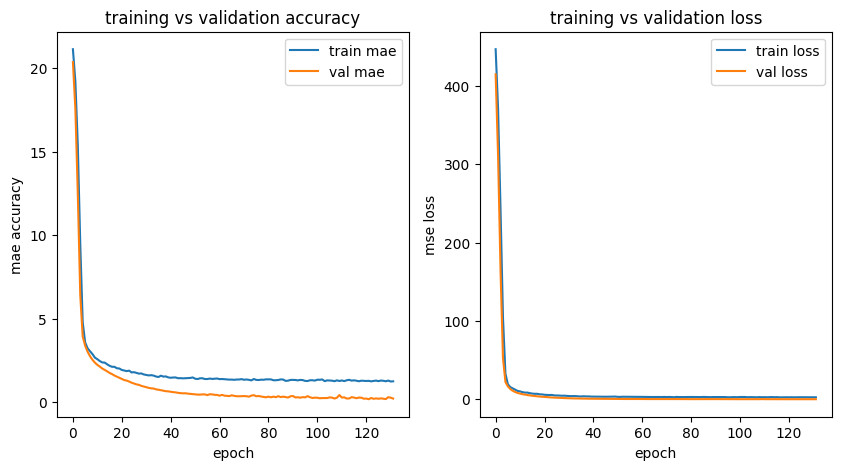

In [18]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['mae'],label='train mae')
plt.plot(history.history['val_mae'],label='val mae')
plt.xlabel('epoch')
plt.ylabel('mae accuracy')
plt.legend()
plt.title('training vs validation accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.xlabel('epoch')
plt.ylabel('mse loss')
plt.legend()
plt.title('training vs validation loss')
plt.show()

In [19]:
model_tuned = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu',input_shape=(4,),kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(32, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.Dense(1)
])

In [20]:
model_tuned.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='mse',
    metrics=['mae']
)

history_tuned = model_tuned.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=300,
    batch_size=64,
    callbacks=[early_stop],
    verbose=2
)

Epoch 1/300
34/34 - 2s - loss: 445.5375 - mae: 21.0874 - val_loss: 474.1329 - val_mae: 21.7731 - 2s/epoch - 60ms/step
Epoch 2/300
34/34 - 0s - loss: 432.0726 - mae: 20.7647 - val_loss: 473.1600 - val_mae: 21.7504 - 118ms/epoch - 3ms/step
Epoch 3/300
34/34 - 0s - loss: 420.3987 - mae: 20.4787 - val_loss: 469.3856 - val_mae: 21.6630 - 275ms/epoch - 8ms/step
Epoch 4/300
34/34 - 0s - loss: 407.4005 - mae: 20.1569 - val_loss: 461.7179 - val_mae: 21.4845 - 196ms/epoch - 6ms/step
Epoch 5/300
34/34 - 0s - loss: 394.6899 - mae: 19.8357 - val_loss: 451.0313 - val_mae: 21.2332 - 122ms/epoch - 4ms/step
Epoch 6/300
34/34 - 0s - loss: 382.1750 - mae: 19.5128 - val_loss: 437.3752 - val_mae: 20.9070 - 122ms/epoch - 4ms/step
Epoch 7/300
34/34 - 0s - loss: 370.9541 - mae: 19.2203 - val_loss: 420.9945 - val_mae: 20.5082 - 118ms/epoch - 3ms/step
Epoch 8/300
34/34 - 0s - loss: 358.1519 - mae: 18.8782 - val_loss: 402.4996 - val_mae: 20.0475 - 128ms/epoch - 4ms/step
Epoch 9/300
34/34 - 0s - loss: 348.2850 - 

In [21]:
val_loss, val_mae = model.evaluate(x_val, y_val)
print(f"Normal Validation MSE: {val_loss:.4f}, MAE: {val_mae:.4f}")


15/15 [==============================] - 0s 1ms/step - loss: 0.0494 - mae: 0.1685
Normal Validation MSE: 0.0494, MAE: 0.1685


In [22]:
val_loss_tuned, val_mae_tuned = model_tuned.evaluate(x_val, y_val)
print(f"Tuned Validation MSE: {val_loss_tuned:.4f}, MAE: {val_mae_tuned:.4f}")


15/15 [==============================] - 0s 2ms/step - loss: 0.4655 - mae: 0.3724
Tuned Validation MSE: 0.4655, MAE: 0.3724


15/15 [==============================] - 0s 2ms/step - loss: 0.2576 - mae: 0.3594
Test MSE: 0.2576
Test MAE: 0.3594
15/15 [==============================] - 0s 3ms/step
Test R2: -13.8754


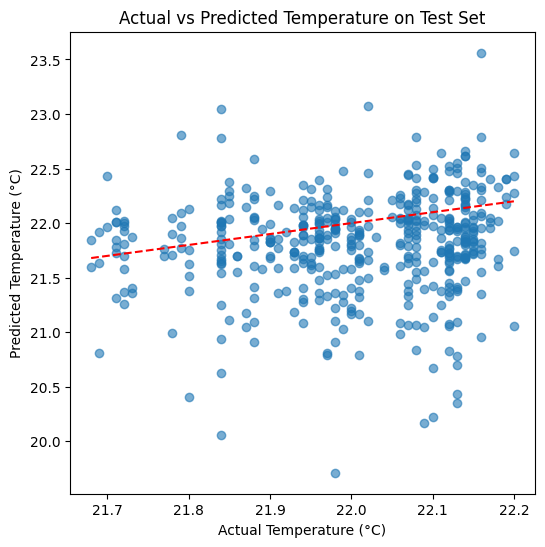

In [23]:
test_loss, test_mae = model_tuned.evaluate(x_test, y_test)
print(f"Test MSE: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

y_test_pred = model_tuned.predict(x_test)

r2 = r2_score(y_test, y_test_pred)
print(f"Test R2: {r2:.4f}")

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Actual vs Predicted Temperature on Test Set")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--')
plt.show()


In [24]:
preds = model.predict(x_test[:5])
for i, p in enumerate(preds):
    print(f"Predicted next temp: {p[0]:.2f}, Actual: {y_test.iloc[i]:.2f}")

1/1 [==============================] - 0s 100ms/step
Predicted next temp: 22.12, Actual: 22.14
Predicted next temp: 21.81, Actual: 22.07
Predicted next temp: 22.21, Actual: 21.93
Predicted next temp: 21.72, Actual: 22.02
Predicted next temp: 22.07, Actual: 22.06
